In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
n_files = 1

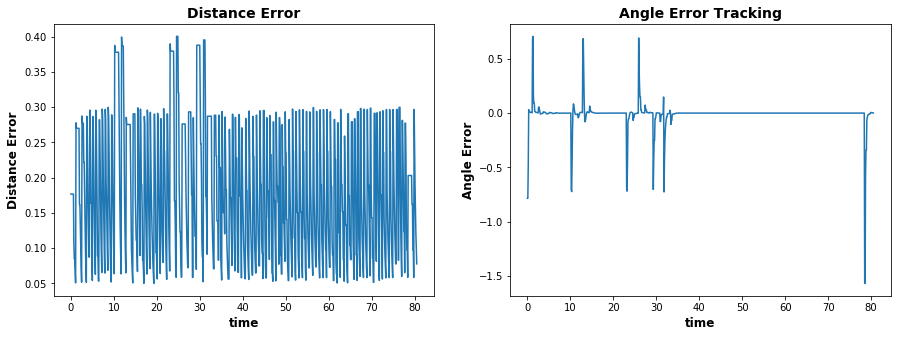

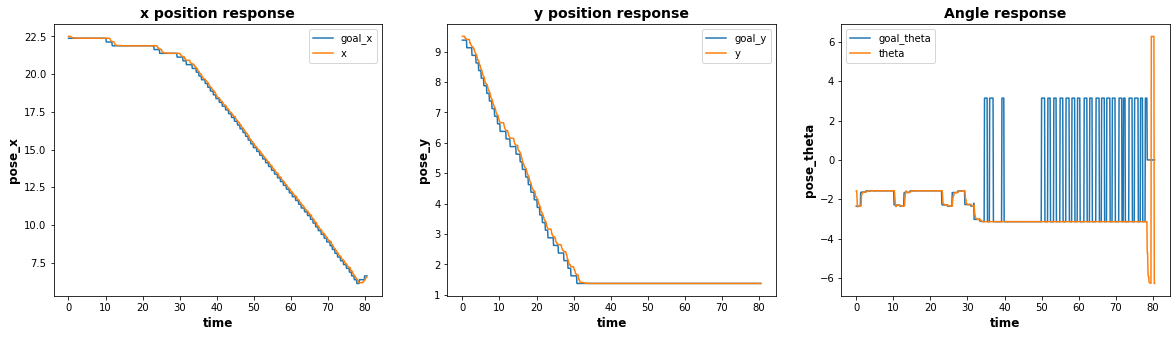

In [14]:
for i in range(n_files):
    data=pd.read_csv('log_data_{}.csv'.format(i+1))
    t=np.arange(data.shape[0])*0.1
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    axes[0].plot(t, data['distance_error'])
    axes[0].set_xlabel('time',fontsize=12,fontweight='bold')
    axes[0].set_ylabel('Distance Error',fontsize=12,fontweight='bold')
    axes[0].set_title('Distance Error',fontsize=14,fontweight='bold')
  
    axes[1].plot(t, data['angle_error'])
    axes[1].set_xlabel('time',fontsize=12,fontweight='bold')
    axes[1].set_ylabel('Angle Error',fontsize=12,fontweight='bold')
    axes[1].set_title('Angle Error Tracking',fontsize=14,fontweight='bold')

    fig, axes = plt.subplots(1, 3, figsize=(20,5))    
    axes[0].plot(t, data['goal_x'],label='goal_x')
    axes[0].plot(t, data['current_x'],label='x')
    axes[0].legend()
    axes[0].set_xlabel('time',fontsize=12,fontweight='bold')
    axes[0].set_ylabel('pose_x',fontsize=12,fontweight='bold')
    axes[0].set_title('x position response',fontsize=14,fontweight='bold')
  
    axes[1].plot(t, data['goal_y'],label='goal_y') 
    axes[1].plot(t, data['current_y'],label='y')
    axes[1].legend()
    axes[1].set_xlabel('time',fontsize=12,fontweight='bold')
    axes[1].set_ylabel('pose_y',fontsize=12,fontweight='bold')
    axes[1].set_title('y position response',fontsize=14,fontweight='bold')
 
    axes[2].plot(t, data['goal_theta'],label='goal_theta')
    axes[2].plot(t, data['theta'],label='theta')
    axes[2].legend()
    axes[2].set_xlabel('time',fontsize=12,fontweight='bold')
    axes[2].set_ylabel('pose_theta',fontsize=12,fontweight='bold')
    axes[2].set_title('Angle response',fontsize=14,fontweight='bold')